In [1]:
#Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Load dataset

In [2]:
df=pd.read_csv('C:/Users/Lenovo/Downloads/Decision Tree/heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [17]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         908 non-null    int64  
 1   cp          908 non-null    object 
 2   trestbps    908 non-null    int64  
 3   chol        908 non-null    int64  
 4   fbs         908 non-null    bool   
 5   restecg     908 non-null    object 
 6   thalch      908 non-null    int64  
 7   exang       908 non-null    object 
 8   oldpeak     846 non-null    float64
 9   slope       908 non-null    object 
 10  thal        908 non-null    object 
 11  num         908 non-null    int64  
 12  sex_Female  908 non-null    bool   
 13  sex_Male    908 non-null    bool   
dtypes: bool(3), float64(1), int64(5), object(5)
memory usage: 80.8+ KB


In [ ]:
#check the missing values 

In [19]:
missing_values =df.isnull().sum()
print(missing_values)

age            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalch         0
exang          0
oldpeak       62
slope          0
thal           0
num            0
sex_Female     0
sex_Male       0
dtype: int64


In [ ]:
#remove missing values

In [21]:
df=df.dropna()

In [24]:
df.isna().sum()

age           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
thal          0
num           0
sex_Female    0
sex_Male      0
dtype: int64

In [ ]:
#ecoding for categorical columns

In [31]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['cp', 'restecg', 'exang', 'slope', 'thal']
encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])


**Model Evalution**

In [ ]:
#split dataset into train &test

In [64]:
x = df.iloc[:,:-1]
y = df['cp']

In [37]:
y

0      3
1      1
2      0
3      3
4      0
      ..
901    0
902    0
903    0
904    0
905    2
Name: cp, Length: 846, dtype: int32

In [38]:
x.columns

Index(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang',
       'oldpeak', 'slope', 'thal', 'num', 'sex_Female'],
      dtype='object')

In [39]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [40]:
xtrain.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex_Female
136,51,3,125,213,False,0,125,1,1.4,2,1,0,False
224,54,1,120,221,False,1,138,0,1.0,2,2,0,True
409,39,0,110,280,False,1,150,0,0.0,1,0,1,False
135,74,1,120,269,False,0,121,1,0.2,2,1,0,True
642,62,1,120,254,False,0,93,1,0.0,1,2,1,False


In [41]:
ytrain

136    3
224    1
409    0
135    1
642    1
      ..
751    0
812    0
73     2
236    0
38     2
Name: cp, Length: 676, dtype: int32

In [42]:
xtest.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex_Female
729,52,2,122,0,False,1,110,1,2.0,0,2,2,False
377,52,1,140,100,False,1,138,1,0.0,0,1,0,False
186,61,1,140,298,True,1,120,1,0.0,1,2,0,True
486,40,0,152,223,False,1,181,0,0.0,2,2,1,False
745,62,0,135,297,False,1,130,1,1.0,1,2,2,False


In [43]:
ytest

729    2
377    1
186    1
486    0
745    0
      ..
590    1
469    0
458    0
566    0
715    0
Name: cp, Length: 170, dtype: int32

In [ ]:
#Decision Tree Classifier

In [44]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array([2, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1,
       0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 3, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 2, 2, 1, 0, 3, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 0, 3, 0,
       2, 0, 1, 3, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 3, 3, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0])

In [45]:
x.columns

Index(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang',
       'oldpeak', 'slope', 'thal', 'num', 'sex_Female'],
      dtype='object')

In [47]:
dt.feature_importances_

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**Model Evaluation**

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00         7

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



In [50]:
confusion_matrix(ytest,ypred)

array([[91,  0,  0,  0],
       [ 0, 35,  0,  0],
       [ 0,  0, 37,  0],
       [ 0,  0,  0,  7]], dtype=int64)

In [51]:
dt.score(xtrain,ytrain)
dt.score(xtest,ytest)

1.0

In [52]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', np.round(dt.score(xtest,ytest),2))

Training accuracy:  1.0
Testing Accuracy:  1.0


In [53]:
x.columns

Index(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang',
       'oldpeak', 'slope', 'thal', 'num', 'sex_Female'],
      dtype='object')

In [54]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex_Female,sex_Male
0,63,3,145,233,True,0,150,0,2.3,0,0,0,False,True
1,41,1,135,203,False,1,132,0,0.0,1,0,0,False,True
2,57,0,140,192,False,1,148,0,0.4,1,0,0,False,True
3,52,3,118,186,False,0,190,0,0.0,1,0,0,False,True
4,57,0,110,201,False,1,126,1,1.5,1,0,0,False,True


In [57]:
df['cp'].unique()

array([3, 1, 0, 2])

In [58]:
df['cp'].nunique()

4

In [62]:
df.dtypes

age             int64
cp              int32
trestbps        int64
chol            int64
fbs              bool
restecg         int32
thalch          int64
exang           int32
oldpeak       float64
slope           int32
thal            int32
num             int64
sex_Female       bool
sex_Male         bool
dtype: object

TypeError: can only concatenate str (not "numpy.int32") to str

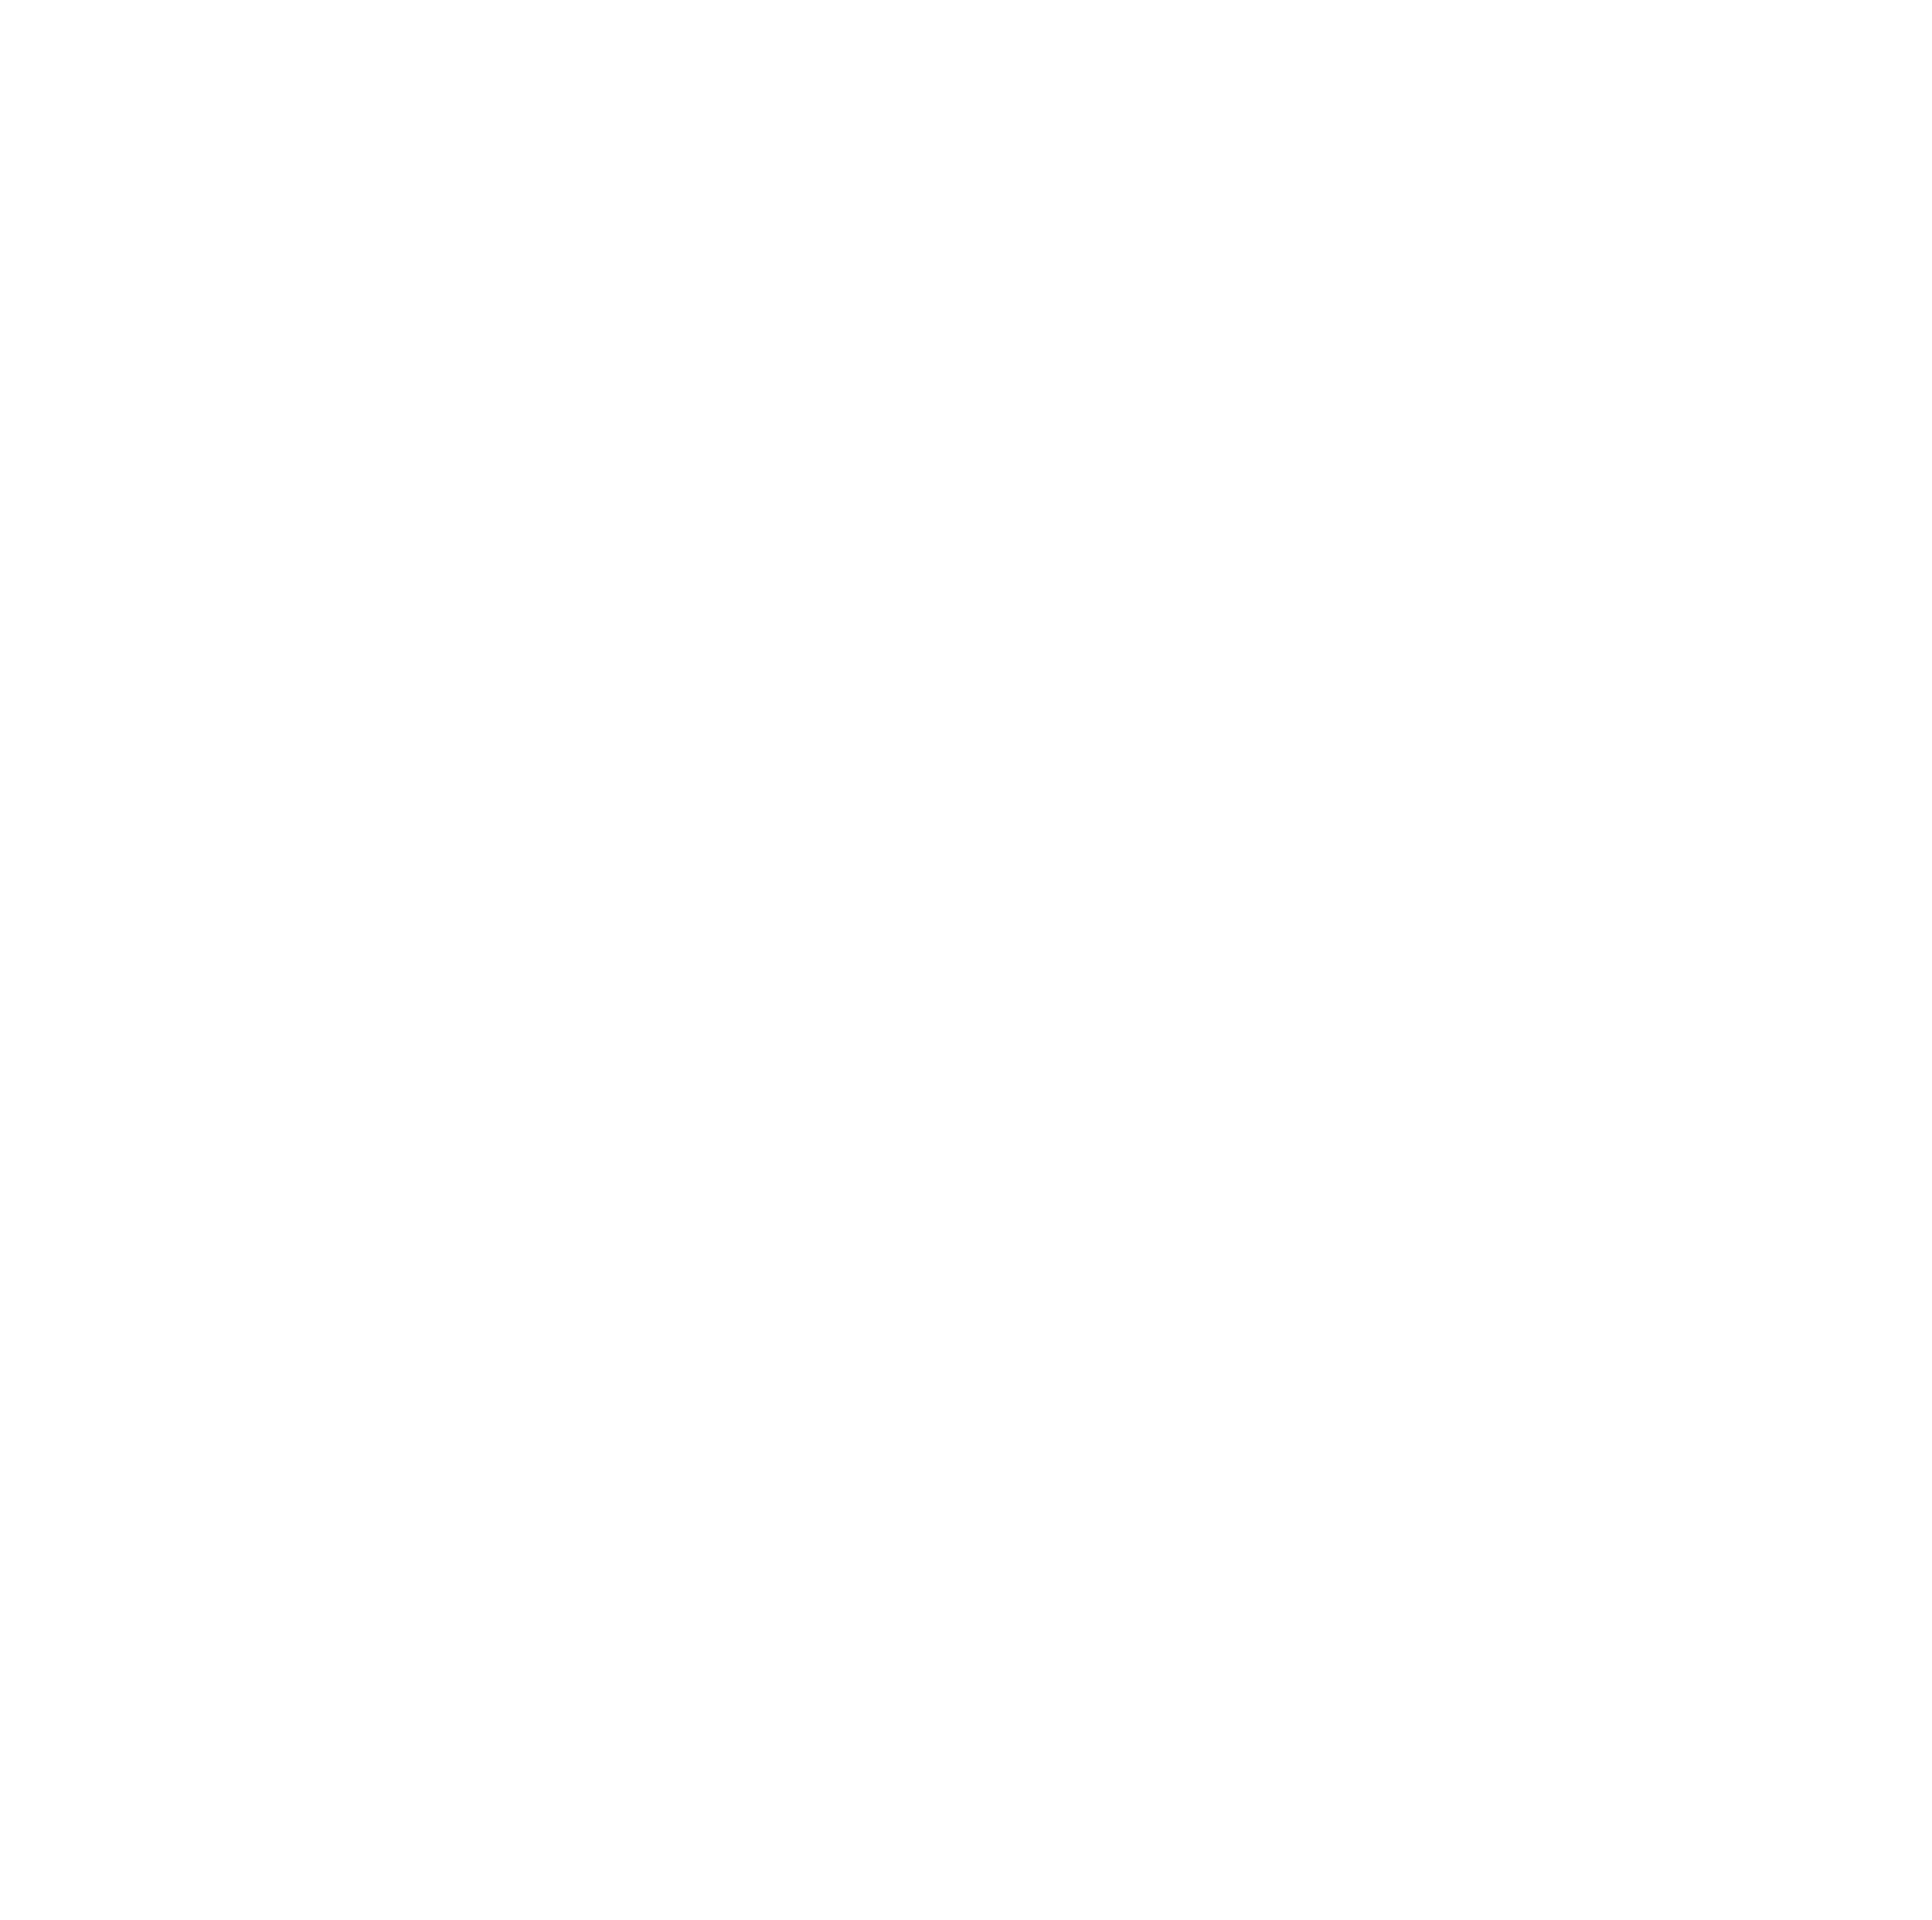

In [65]:
tree.plot_tree(dt,feature_names=x.columns, class_names=df['cp'].unique(), filled=True)
plt.show()

In [ ]:
#return all information gain from all columns

In [67]:
dt.feature_importances_

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**CART**

In [ ]:
#Classification

In [69]:
df.head(2)

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex_Female,sex_Male
0,63,3,145,233,True,0,150,0,2.3,0,0,0,False,True
1,41,1,135,203,False,1,132,0,0.0,1,0,0,False,True


In [70]:
dtc = DecisionTreeClassifier(criterion='gini')

In [71]:
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)
ypred

array([2, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1,
       0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 3, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 2, 2, 1, 0, 3, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 0, 3, 0,
       2, 0, 1, 3, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 3, 3, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0])

In [72]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00         7

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



In [73]:
dtc.score(xtrain,ytrain), dtc.score(xtest,ytest)

(1.0, 1.0)

**Regression**

In [74]:
df.head(5)

,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex_Female,sex_Male
0,63,3,145,233,True,0,150,0,2.3,0,0,0,False,True
1,41,1,135,203,False,1,132,0,0.0,1,0,0,False,True
2,57,0,140,192,False,1,148,0,0.4,1,0,0,False,True
3,52,3,118,186,False,0,190,0,0.0,1,0,0,False,True
4,57,0,110,201,False,1,126,1,1.5,1,0,0,False,True


In [75]:
x = df.iloc[:,:3]
y = df['num']

In [76]:
x

,age,cp,trestbps
0,63,3,145
1,41,1,135
2,57,0,140
3,52,3,118
4,57,0,110
...,...,...,...
901,51,0,110
902,62,0,160
903,53,0,125
904,62,0,166


In [77]:
y

0      0
1      0
2      0
3      0
4      0
      ..
901    4
902    4
903    4
904    4
905    4
Name: num, Length: 846, dtype: int64

In [ ]:
#Split dataset into tarining & testing

In [78]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
dtr = DecisionTreeRegressor()

dtr.fit(xtrain,ytrain)
yp = dtr.predict(xtest)
yp

array([0.        , 1.        , 0.        , 0.        , 3.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       2.5       , 1.        , 0.        , 1.        , 0.66666667,
       1.        , 0.        , 0.        , 0.        , 2.        ,
       1.        , 0.        , 2.        , 3.        , 1.33333333,
       0.        , 3.        , 0.5       , 0.5       , 0.        ,
       0.        , 1.        , 3.        , 0.        , 0.        ,
       2.        , 0.        , 3.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 4.        ,
       0.        , 4.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 2.5       , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.5       ,
       2.        , 1.        , 0.        , 1.        , 0.        ,
       1.5       , 0.        , 1.        , 0.        , 0.        ,
       4.        , 0.        , 0.        , 0.        , 0.     

In [81]:
dtr.score(xtrain,ytrain), dtr.score(xtest,ytest)

(0.8831673115510889, -0.5505457858520773)

In [82]:
from sklearn.metrics import mean_squared_error

In [83]:
mse = mean_squared_error(ytest,yp)
import numpy as np
mse

2.1484033245844265

In [84]:
rmse = np.sqrt(mse)
rmse

1.4657432669415291

In [85]:
x.columns

Index(['age', 'cp', 'trestbps'], dtype='object')

In [86]:
plt.figure(figsize = (20,20),dpi = 500)
tree.plot_tree(dtr, feature_names=['age', 'cp', 'trestbps'], filled=True)
plt.show()